# Creación pipeline

# Creación pipeline

Se procede a importar librerias.

In [4]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
import matplotlib.pyplot as plt

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
#Librerías para la visualización
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn
import seaborn as sns 
from sklearn import tree
#MD con 
from IPython.display import Markdown as md

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

#Transformadores
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
nombre_archivo = 'train.csv'
# Se cargan los datos
df_original = pd.read_csv(nombre_archivo, sep = ',', encoding = 'utf-8', index_col = 0)
# Cantidad de datos y número de variables
t = df_original.shape
df_original.shape

(2644, 19)

In [6]:
md(f"Se tuvo {t[0]} filas y {t[1]} columnas sin incluir el ID de cada registro. Se observaron los primeros registros:")

Se tuvo 2644 filas y 19 columnas sin incluir el ID de cada registro. Se observaron los primeros registros:

In [7]:
df_original.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
# Podemos ver los tipos de todas la variables
df_original.dtypes 

Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  10-19 years              float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Note que todas las variables son numéricas, lo que facilita el análisis para la regresión lineal.

Se observó si hay atributos nulos:

In [9]:
# Se observan las ausencias
s= df_original.isnull().sum()
df_original.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Note que no existen valores nulos.

Se creó una copia de los datos para procesarlos a limpio:

In [10]:
df_l = df_original.copy()

Se hizo un análisis preliminar de la variable objetivo:

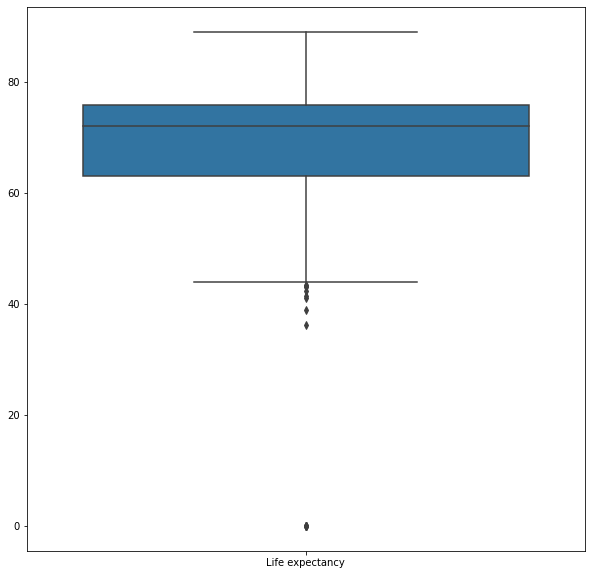

In [11]:
#Se visualizan todos los valores
atributo = "Life expectancy"
fig=plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_l[[atributo]], orient="v")

Se decidió quitar los valores atípicos para comprender mejor la influencia de las demás variables sobre la variable objetivo:

In [12]:
vo = 'Life expectancy'
df_l = df_l[df_l['Life expectancy'] >44]

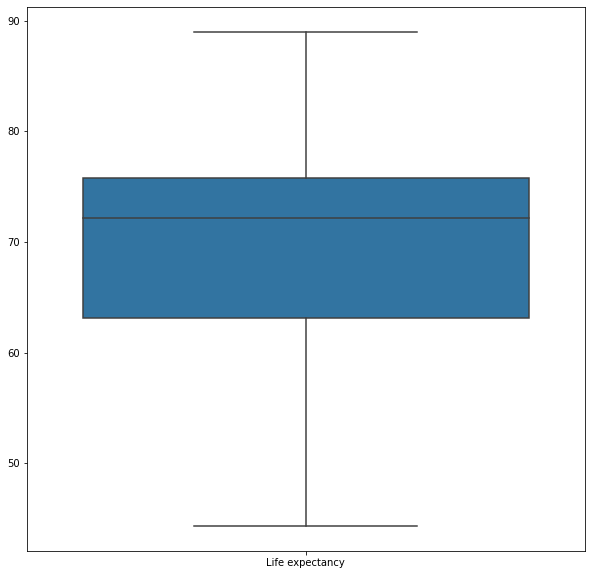

In [13]:
#Se visualizan todos los valores
atributo = "Life expectancy"
fig=plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_l[[atributo]], orient="v")

Se realizó un análisis sobre cada una de las variables para ver su relación con la variable objetivo:

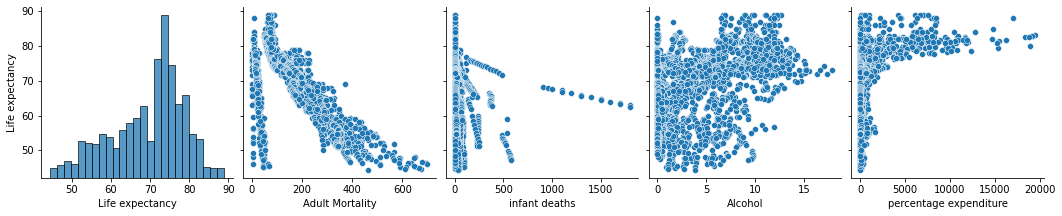

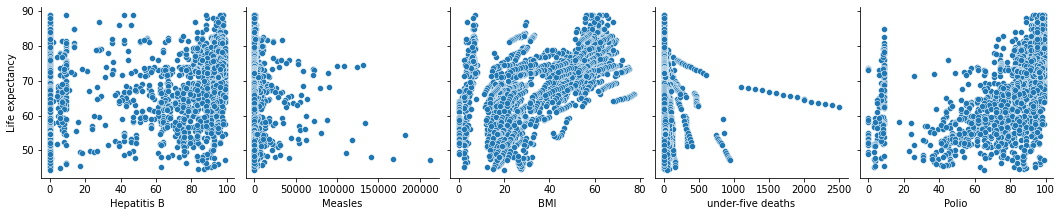

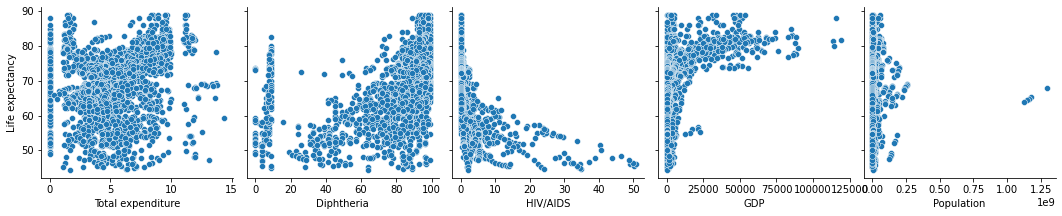

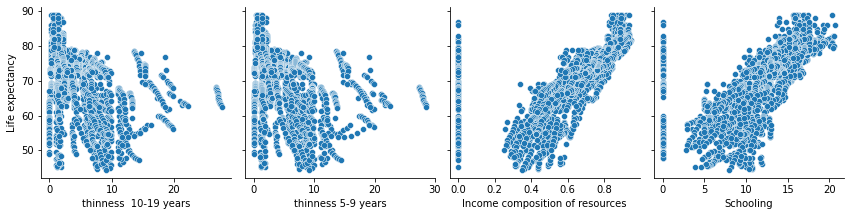

In [14]:
sns.pairplot(df_l, height=3, y_vars = vo, x_vars = df_l.columns[0:5], kind='scatter')
sns.pairplot(df_l, height=3, y_vars = vo, x_vars = df_l.columns[5:10], kind='scatter')
sns.pairplot(df_l, height=3, y_vars = vo, x_vars = df_l.columns[10:15], kind='scatter')
sns.pairplot(df_l, height=3, y_vars = vo, x_vars = df_l.columns[15:], kind='scatter')

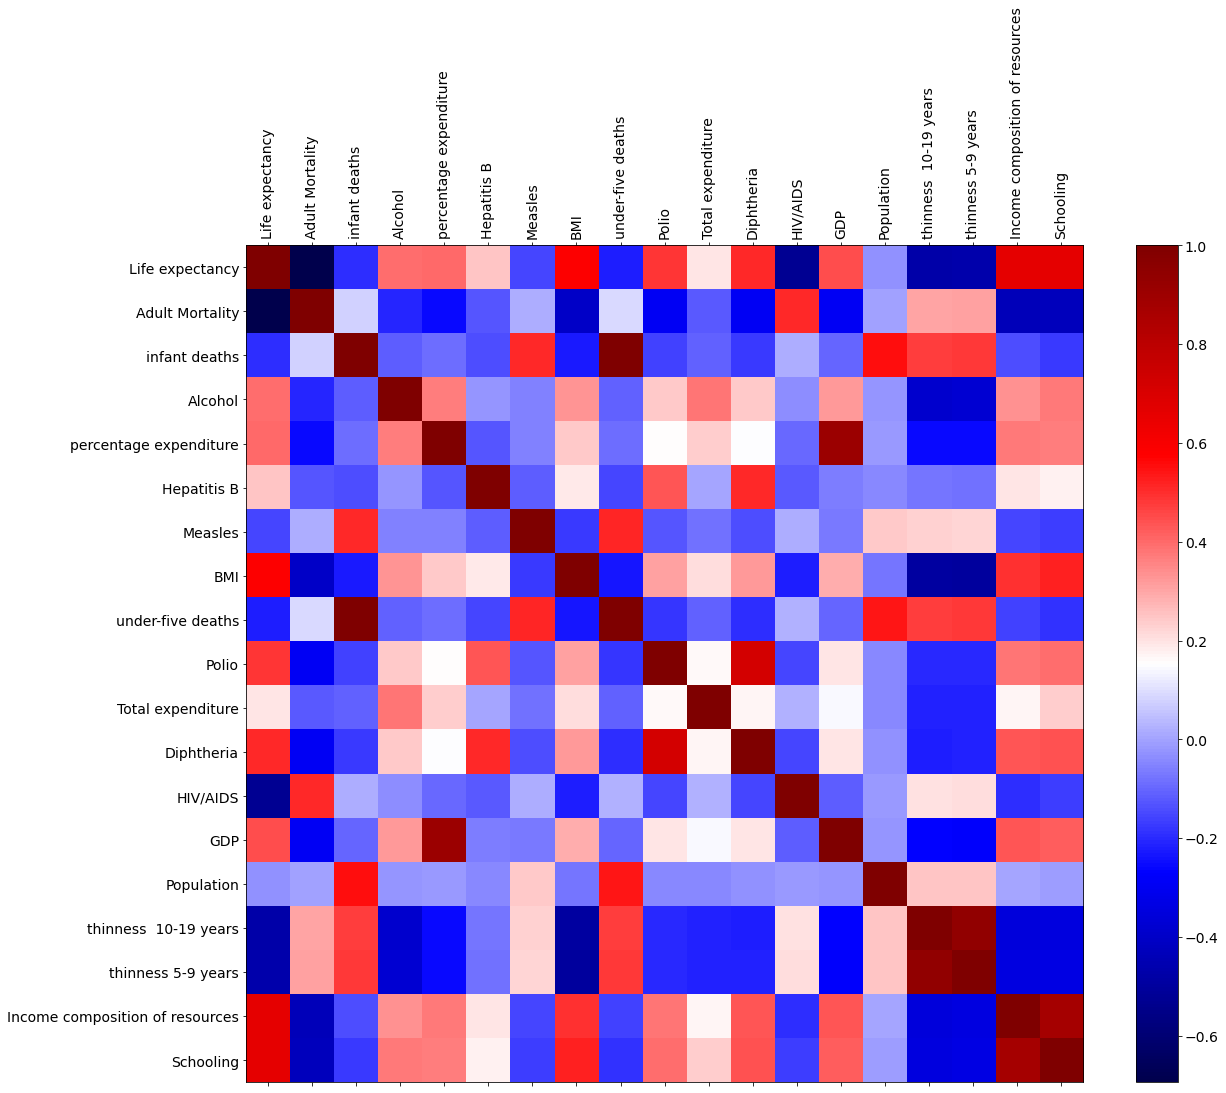

In [15]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_l.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_l.columns.shape[0]), df_l.columns, fontsize=14, rotation=90)
plt.yticks(range(df_l.columns.shape[0]), df_l.columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)


In [16]:
# Create correlation matrix
corr_matrix = df_l.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

In [17]:
le = upper.iloc[0]
col_correlacion =le[le > 0.6].index.to_list()
print("Columnas con alta correlación:",col_correlacion)
col_por_transformar = ['GDP','Alcohol','percentage expenditure', 'BMI']
print("Columnas con posibles correlaciones no lienales:",col_por_transformar)

Columnas con alta correlación: ['Adult Mortality', 'Income composition of resources', 'Schooling']
Columnas con posibles correlaciones no lienales: ['GDP', 'Alcohol', 'percentage expenditure', 'BMI']


Inicialmente se decidió usar las columnas 'Adult Mortality', 'Income composition of resources' y 'Schooling' por su alta correlación con la variable objetivo.

Por otro lado se decidió usar Alcohol,Percentage expenditure, BMI y GDP por los graficos que se realizaron que, aún sin tener una correlación lineal tan alta, pueden tener una correlación si se realiza una transformación sobre los datos

Para todas las columnas escogidas se realizó un análisis individual

In [18]:
# Se arreglan datos puntuales
# Para quitar dato
#df_l = df_l[df_l[atributo] != 8]
# Para reemplazar dato
#df_l[atributo].replace("", "", inplace = True)
# Para pasar a numérico
#df_l[atributo] = pd.to_numeric(df_l[atributo], errors='coerce')
# Para strings que son realmente numéricos
#df_l[pd.to_numeric(df_l[atributo], errors='coerce').isnull()][atributo].value_counts().to_frame()
#df_l[atributo].value_counts().to_frame()

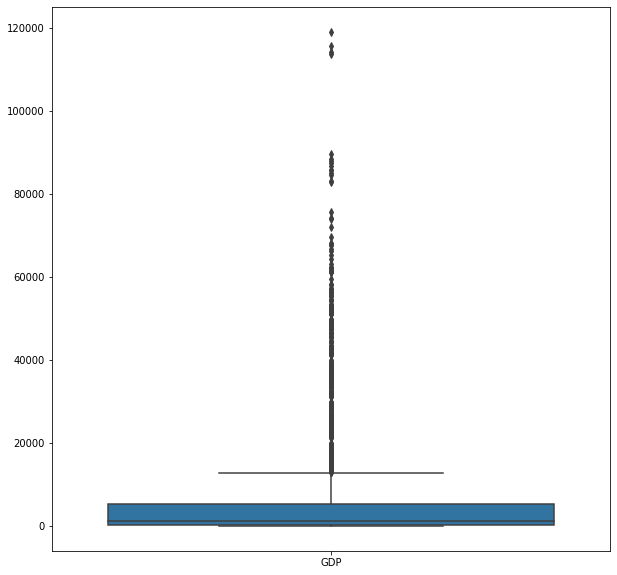

In [19]:
#Se visualizan todos los valores
atributo = 'GDP'
fig=plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_l[[atributo]], orient="v")

In [20]:
#df_l = df_l[df_l['GDP'] < 1300]

Aunque existen varios datos atípicos, por el gráfico de dispersión se puede ver que la expectativa de vida aumenta a medida que aumenta el GDP, entonces no se modificó la variable.

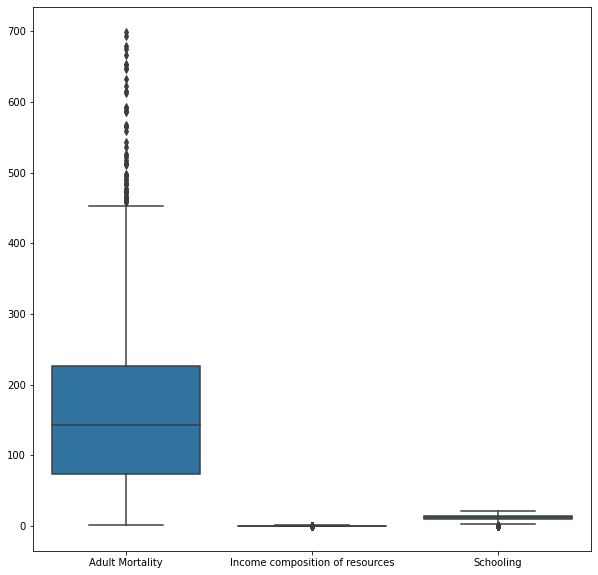

In [21]:
#Se visualizan todos los valores
fig=plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_l[col_correlacion], orient="v")

Se hará una mejor visualización por cada columna:

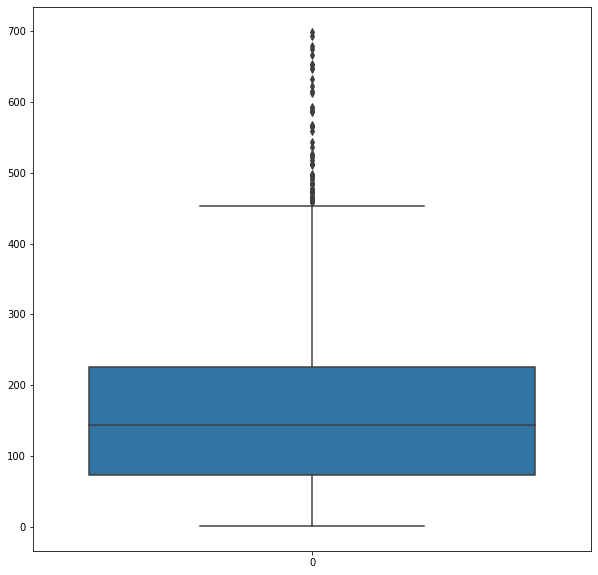

In [22]:
#Se visualizan todos los valores
fig=plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_l[col_correlacion[0]], orient="v")

Note que 25% de los datos se acumulan antes de 100.

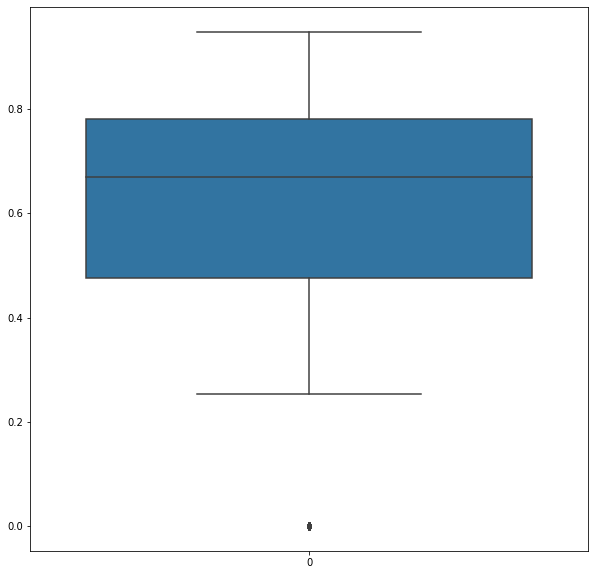

In [23]:
fig=plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_l[col_correlacion[1]], orient="v")

Note que existen datos. atípicos en 0.0.

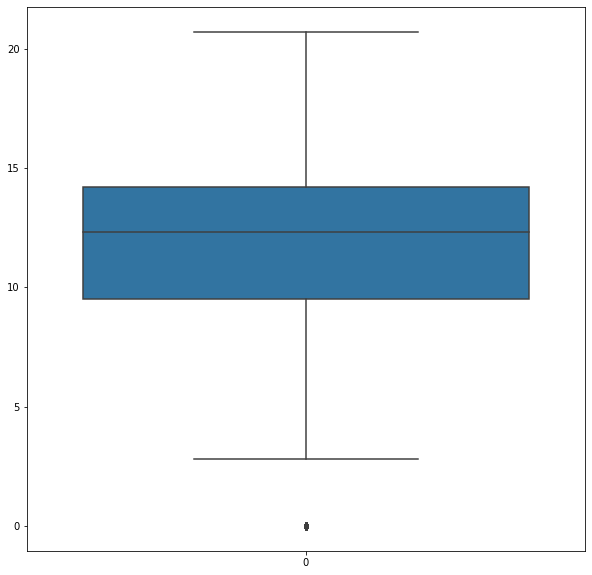

In [24]:
fig=plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_l[col_correlacion[2]], orient="v")

Note que existen datos. atípicos en 0.0.

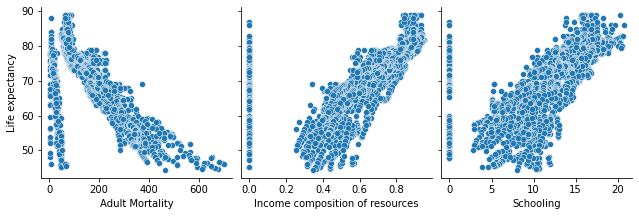

In [25]:
sns.pairplot(df_l, height=3, y_vars = vo, x_vars = df_l[col_correlacion], kind='scatter')

Note que se pueden ver varios de los datos atípicos que no permiten una buena distribución lineal, por lo que se retiran de la muestra:

In [26]:
df_l = df_l[df_l['Adult Mortality'] > 90]

In [27]:
df_l = df_l[df_l['Income composition of resources'] > 0.1]

In [28]:
df_l = df_l[df_l['Schooling'] > 1]

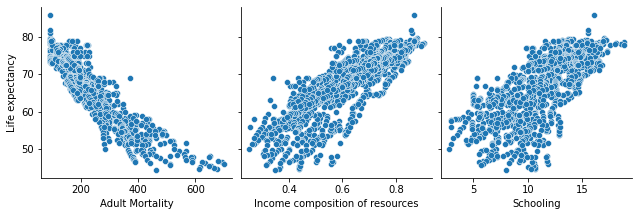

In [29]:
sns.pairplot(df_l, height=3, y_vars = vo, x_vars = df_l[col_correlacion], kind='scatter')

Tras realizar la limpieza de datos, se visualizaron las estadísticas de las columnas seleccionadas:

In [30]:
df_l[col_correlacion].describe()

,Adult Mortality,Income composition of resources,Schooling
count,1582.000000,1582.000000,1582.000000
mean,216.573325,0.615374,11.403540
std,103.684113,0.143621,2.834677
min,91.000000,0.253000,2.800000
25%,141.250000,0.491000,9.700000
50%,185.000000,0.642000,11.800000
75%,271.000000,0.730000,13.300000
max,699.000000,0.904000,18.800000


Se muestra un subconjunto de los datos después del preprocesamiento:

In [31]:
df_l.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [37]:
df_l.to_json("./assets/pruebas.json", "records")

## 2. Modelo: Regresión lineal

El algoritmo de regresión lineal busca minimizar la distancia cuadrada entre todos los datos y una recta en el espacio. Para ello hace uso de variables numéricas para determinar su correlación con la variable objetivo.

Se visualizaron las colinealidades en cada variable:

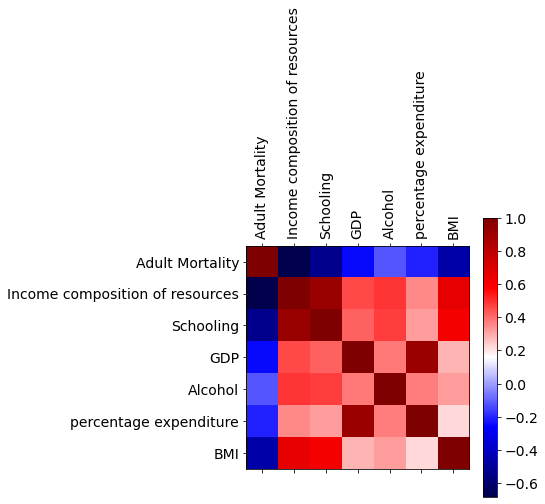

In [32]:
selected_cols =col_correlacion+col_por_transformar
df_temp = df_l[selected_cols]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

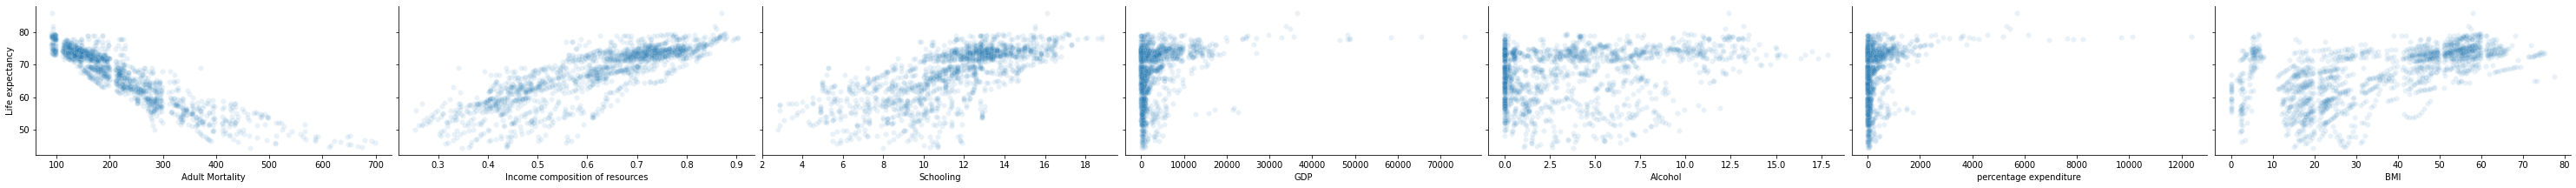

In [33]:
sns.pairplot(df_l, height=3, aspect = 2, y_vars = vo, x_vars = selected_cols, kind='scatter', plot_kws = {'alpha':0.1})

In [34]:
md(f"Se seleccionaron {selected_cols} por su baja colinealidad siguiendo los supuestos de una regresión lineal y se graficaron para ver su relación.")

Se seleccionaron ['Adult Mortality', 'Income composition of resources', 'Schooling', 'GDP', 'Alcohol', 'percentage expenditure', 'BMI'] por su baja colinealidad siguiendo los supuestos de una regresión lineal y se graficaron para ver su relación.

In [35]:
#Se crean los datos
X = df_l.drop(vo, axis = 1)
y = df_l[vo]

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

#En caso de regresión polinómica
#('polynom', PolynomialFeatures(2)),

model = [('model', LinearRegression())]

p = Pipeline(pre+model)

p = p.fit(X,y)

In [36]:
# Usamos la lbreria joblib
filename = './assets/modelo.joblib'
# Se guarda
dump(p, filename) 

['./assets/modelo.joblib']